# AO3 Project
## Tags Assessment


### Introduction
___

This document will contain analysis of the AO3 tags. We start by assessing a sample data set.

In [32]:
import pandas as pd
import csv
import sqlite3

# Assessing Top Tags
data = pd.read_csv("small_story_tags.csv")
try:
    data = data.drop(columns= ["Unnamed: 0"])
    data= data.drop(columns=["Unnamed: 0.1"])
except:
    pass

# Top 40 Tags
tag_count = data["Tag Name"].value_counts()[:40]

tag_list = []
count_list = []
for value in tag_counts.index.to_list():
    tag_list.append(value)
    count_list.append(tag_counts[value])


top_40 = pd.DataFrame({ "Tag Name": tag_list,
                       "Total Uses": count_list
})
unique_stories = []

for number in data["storyId"]:
    if number not in unique_stories:
        unique_stories.append(number)
    
print(len(unique_stories))
data

469


,storyId,tagId,Tag Name,Tag Type
0,3,1,No Archive Warnings Apply,warning
1,3,2,Other,category
2,3,3,Viggo Mortensen/Orlando Bloom,relationship
3,3,4,Lord of the Rings RPF,fandom
4,3,5,Sean Bean,character
...,...,...,...,...
4189,11615,1891,Brendon Urie,character
4190,11615,1892,Ryan Ross,character
4191,11615,1893,Jon Walker,character
4192,11615,1894,Zack Hall,character


# 1000 

---
Goals with assessing tags: most popular fandoms, most popular tags within each fandom.

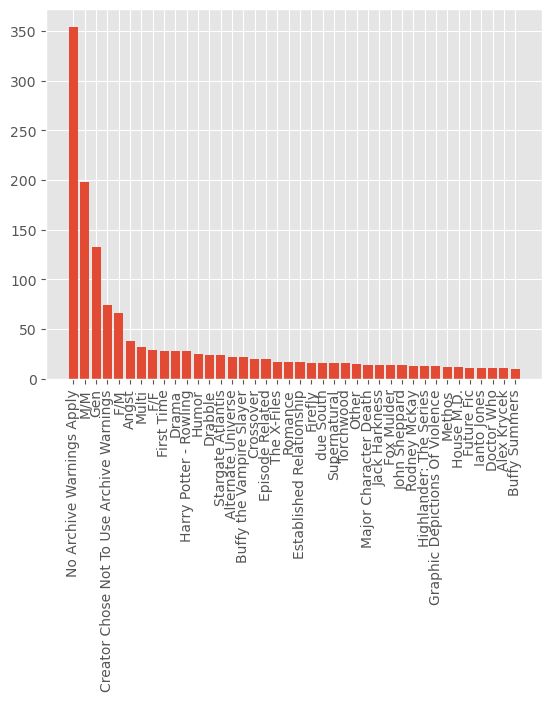

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Graphing our Series
plt.bar(top_40.index.to_list(), top_40["Total Uses"])
plt.xticks(top_40.index.to_list(), top_40["Tag Name"], rotation = 90)
plt.show()